In [52]:
from importlib import reload
import matplotlib.pyplot as plt
import sex_group_data
import drug_type_data
import age_group_data
reload(sex_group_data)
reload(drug_type_data)
reload(age_group_data)


<module 'age_group_data' from '/Users/drew/Documents/GitHub/ECE-143-Group-2-24wi/Final_product/age_group_data.py'>

In [54]:
male_data, female_data = sex_group_data.get()
drug_data = drug_type_data.get()
age_data = age_group_data.get()
drug_types = list(set(drug_data.index.get_level_values(0)))
years = list(set(drug_data.index.get_level_values(1)))



In [60]:
print(male_data[2021].head(4))

DrugType
All drugs                                                74301
Any Opioid                                               56757
Benzodiazepines                                           7443
Cannabis                                                   852
Cocaine                                                  17628
Opioid subgroup - heroin                                  6801
Opioid subgroup - methadone                               2159
Opioid subgroup – including fentanyl                     51030
Opioid subgroup – including oxycodone and hydrocodone     8268
Psychostimulants – incl. methamphetamine                 23319
Name: AllAges, dtype: int64


In [ ]:
top_ranking_drugs = ['']
sex_group_data_fig = plt.figure(figsize=(15,8))

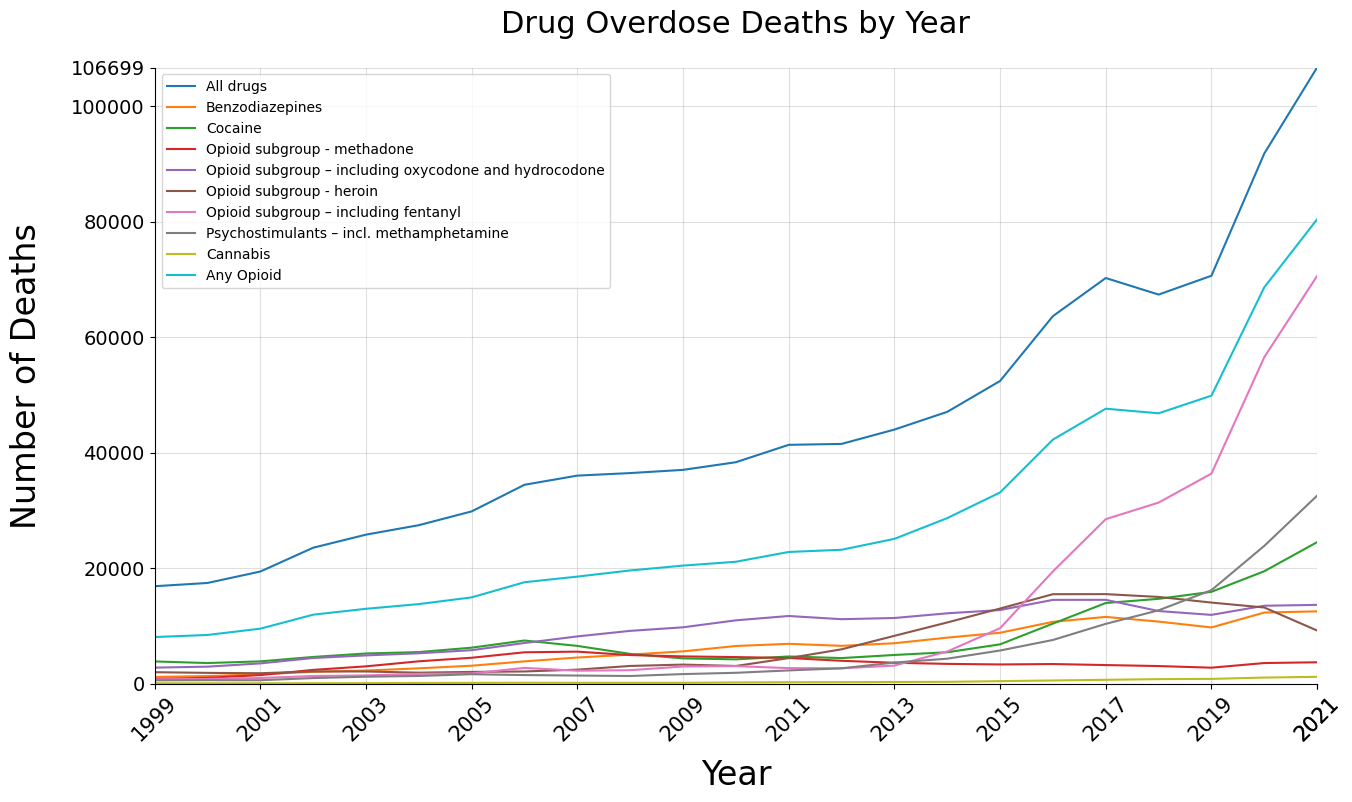

In [37]:
drug_data_fig = plt.figure(figsize=(15, 8))
drug_data_ax = drug_data_fig.add_subplot()

drug_data_ax.set_title('Drug Overdose Deaths by Year', size=22, pad=25)
drug_data_ax.spines['right'].set_visible(False)
drug_data_ax.spines['top'].set_visible(False)
drug_data_ax.grid(visible=True,
        which='major',
        axis='both',
        alpha=.4)

# Formatting X-Axis
drug_data_ax.set_xlabel('Year', labelpad=10.0, size=24)
drug_data_ax.set_xticks(list(range(1999,2022,2))+[2021])
drug_data_ax.set_xticklabels(years[::2]+[2021], size=15, rotation=45)
drug_data_ax.set_xlim(left=min(years), right=max(years))

# Formatting Y-Axis
drug_data_ax.set_ylabel('Number of Deaths', labelpad=20, size=24)
drug_data_y_labels = [10000*scal for scal in range(0,11,2)]+[max(drug_data['All drugs'])]
drug_data_ax.set_yticks(drug_data_y_labels)
drug_data_ax.set_yticklabels(labels=y_labels, size=14)
drug_data_ax.set_ylim(bottom=0, top=drug_data['All drugs'][2021])

# Plotting lines for each drug
for drug in drug_types:
      drug_data_ax.plot(years,drug_data[drug], label=drug)

drug_data_ax.legend(loc='upper left')
